# 1)

In [1]:
import requests
import json
import csv
import pandas as pd

lat= "42.0987"
long= "-75.9180"
genius = requests.get(f"https://api.weather.gov/points/{lat},{long}")
                     
json_file = genius.json()

forecast = json_file["properties"]['forecast']

newrequest = requests.get(forecast)
new_request = newrequest.json()

day = new_request["properties"]["periods"][1]["name"]
temp = new_request["properties"]["periods"][1]["temperature"]
tempunit = new_request["properties"]["periods"][1]["temperatureUnit"]
forecast = new_request["properties"]["periods"][1]["detailedForecast"]

In [2]:
csv_file = open("weather.csv", "w", newline = "", encoding = "utf-8")
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["day", "temp (F)", "forecast"])

for i in range(0,13):
    day = new_request["properties"]["periods"][i]["name"]
    temp = new_request["properties"]["periods"][i]["temperature"]
    forecast = new_request["properties"]["periods"][i]["detailedForecast"]
    
    csv_writer.writerow([day, temp, forecast])
csv_file.close()

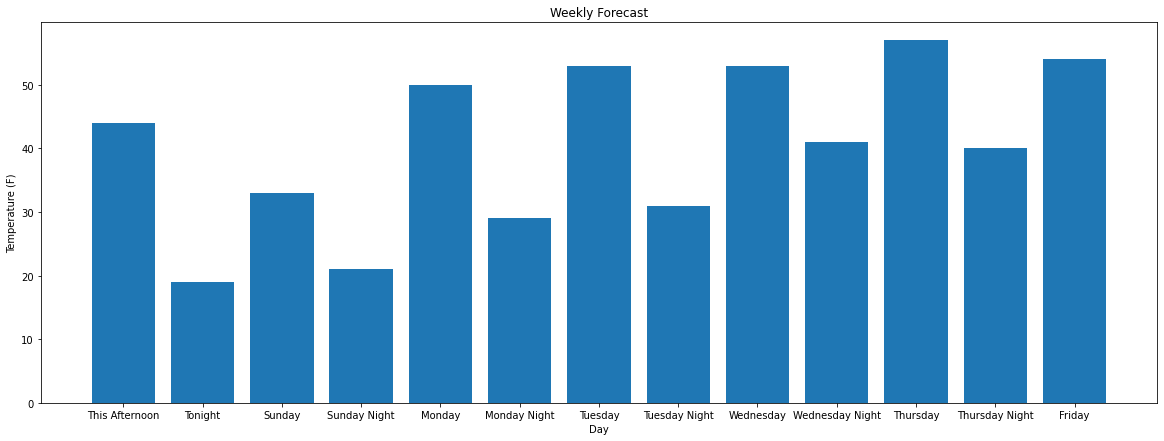

In [3]:
from matplotlib import pyplot as plt
import numpy as np

sheet = pd.read_csv("weather.csv")

df = pd.DataFrame(sheet)

Day = df["day"]
Temp = df["temp (F)"]

fig = plt.figure(figsize = (20,7)) #bonus? I just increased the width of the figure size. Source: my brain/harp 150?
plt.bar(Day, Temp)

plt.xlabel("Day")
plt.ylabel("Temperature (F)")
plt.title("Weekly Forecast")

plt.show()

# 2)

In [39]:
call_1 = requests.get(f"https://date.nager.at/api/v3/CountryInfo/US")
call_2 = requests.get(f"https://date.nager.at/api/v3/AvailableCountries")
call_3 = requests.get(f"https://date.nager.at/api/v3/LongWeekend/2022/US")
call_4 = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/2023/US")
call_5 = requests.get(f"https://date.nager.at/api/v3/IsTodayPublicHoliday/US?offset=0")
call_6 = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidays/US")
call_7 = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidaysWorldwide")

In [43]:
json_1 = call_1.json() # gives country information for a given country
print(json_1)
print("")

json_2 = call_2.json() # gives a list of dictionaries containing the country code and country of each available country
print(json_2)
print("")

json_3 = call_3.json() # gives a list of long weekends for a given country
print(json_3)
print("")

json_4 = call_4.json() # lists each public holiday with its info for a given country and year
print(json_4)
print("")

print(call_5) #gives a response of 200 (is public holiday today), 204 (not public holiday today), 400 (Validation failure), or 404 (CountryCode is unknown)
print("")

json_6 = call_6.json() # shows a list of upcoming holidays and info and includes states where the holiday is not a public holiday
print(json_6)
print("")

json_7 = call_7.json() # shows a list of every upcoming holiday for the countries with available data
print(json_7)
print("")

{'commonName': 'United States', 'officialName': 'United States of America', 'countryCode': 'US', 'region': 'Americas', 'borders': [{'commonName': 'Canada', 'officialName': 'Canada', 'countryCode': 'CA', 'region': 'Americas', 'borders': None}, {'commonName': 'Mexico', 'officialName': 'United Mexican States', 'countryCode': 'MX', 'region': 'Americas', 'borders': None}]}

[{'countryCode': 'AD', 'name': 'Andorra'}, {'countryCode': 'AL', 'name': 'Albania'}, {'countryCode': 'AR', 'name': 'Argentina'}, {'countryCode': 'AT', 'name': 'Austria'}, {'countryCode': 'AU', 'name': 'Australia'}, {'countryCode': 'AX', 'name': 'Åland Islands'}, {'countryCode': 'BA', 'name': 'Bosnia and Herzegovina'}, {'countryCode': 'BB', 'name': 'Barbados'}, {'countryCode': 'BE', 'name': 'Belgium'}, {'countryCode': 'BG', 'name': 'Bulgaria'}, {'countryCode': 'BJ', 'name': 'Benin'}, {'countryCode': 'BO', 'name': 'Bolivia'}, {'countryCode': 'BR', 'name': 'Brazil'}, {'countryCode': 'BS', 'name': 'Bahamas'}, {'countryCode':

# 3)

In [4]:
country_code = "IT"
country_request = requests.get(f"https://date.nager.at/api/v3/publicholidays/2023/{country_code}")
json_file = country_request.json()
json_file

[{'date': '2023-01-01',
  'localName': 'Capodanno',
  'name': "New Year's Day",
  'countryCode': 'IT',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': 1967,
  'types': ['Public']},
 {'date': '2023-01-06',
  'localName': 'Epifania',
  'name': 'Epiphany',
  'countryCode': 'IT',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-09',
  'localName': 'Pasqua',
  'name': 'Easter Sunday',
  'countryCode': 'IT',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-10',
  'localName': "Lunedì dell'Angelo",
  'name': 'Easter Monday',
  'countryCode': 'IT',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': 1642,
  'types': ['Public']},
 {'date': '2023-04-25',
  'localName': 'Festa della Liberazione',
  'name': 'Liberation Day',
  'countryCode': 'IT',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear

In [18]:
counter = []
def holiday_counter(country):
    country_request = requests.get(f"https://date.nager.at/api/v3/publicholidays/2023/{country}")
    json_file = country_request.json()
    for i in json_file:
        counter.append(i)
        length = len(counter)
    return length
    #tried to add counter.clear() in this line
    
italy = holiday_counter("IT")
counter.clear() #tried to add it to the end of the function, but the values for each country kept adding to the previous one even after clearing, idk why

sweden = holiday_counter("SE")
counter.clear()

united_states = holiday_counter("US")
counter.clear()

argentina = holiday_counter("AR")
counter.clear()

canada = holiday_counter("CA")
counter.clear()

chile = holiday_counter("CL")
counter.clear()

china = holiday_counter("CN")
counter.clear()

egypt = holiday_counter("EG")
counter.clear()

greece = holiday_counter("GR")
counter.clear()

switzerland = holiday_counter("CH")
counter.clear()

countries = [italy, sweden, united_states, argentina, canada, chile, china, egypt, greece, switzerland]
for i in countries:
    print(i)

12
16
13
16
30
16
7
6
15
19


# Bonus

In [22]:
y_values = []
for i in countries:
    y_values.append(i)
    
print(y_values)

[12, 16, 13, 16, 30, 16, 7, 6, 15, 19]


In [24]:
x_values = ["Italy", "Sweden", "United States", "Argentina", "Canada", "Chile", "China", "Egypt", "Greece", "Switzerland"]


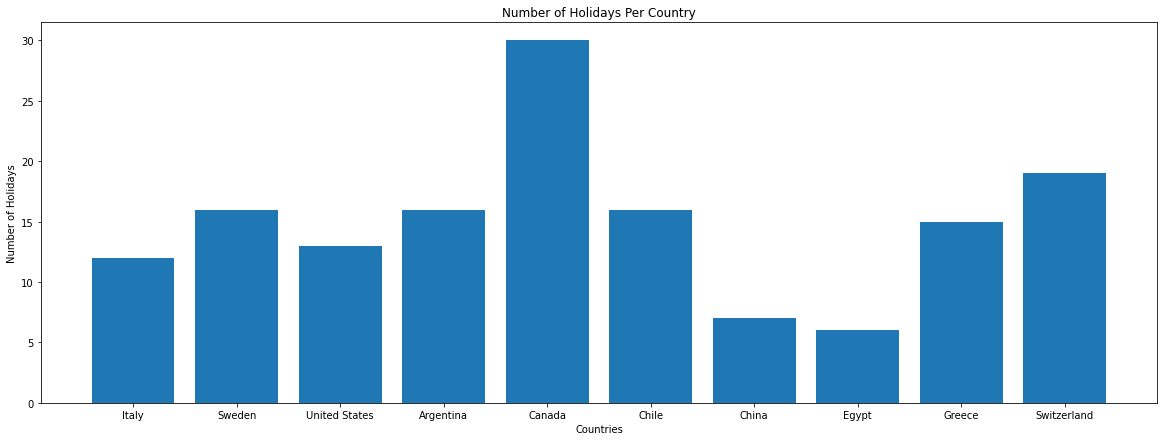

In [27]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize = (20,7)) 
plt.bar(x_values, y_values)

plt.xlabel("Countries")
plt.ylabel("Number of Holidays")
plt.title("Number of Holidays Per Country")

plt.show()